# **Diskritisasi Data**

Diskritisasi data adalah proses mengubah data numerik kontinu (seperti 5.1, 3.4, dll) menjadi data diskret atau kategori (seperti 'A', 'B', 'rendah', 'tinggi', dll).

**Tujuan Diskritisasi**
- Menyederhanakan data untuk algoritma tertentu.

- Mempermudah interpretasi dan visualisasi.

- Diperlukan oleh metode yang hanya menerima data kategorikal (contohnya: Naive Bayes dengan asumsi multinomial).

# **Implementasi**

Melakukan diskritisasi menggunakan K-means clustreing pada data iris dan lakukan klasifikasi dengan metode naive bayes dan pohon keputusan pada data yang sudah didiskritisasi dan sebelum diskritisasi.

In [25]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.cluster import KMeans
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sepal length

In [27]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Tampilkan hanya kolom 'sepal_length'
print(df_merged[["id", "sepal length"]].to_string(index=False))


 id  sepal length
  1           4.8
  2           4.9
  3           4.7
  4           4.6
  5           5.0
  6           5.4
  7           4.6
  8           5.0
  9           4.4
 10           4.9
 11           5.4
 12           4.8
 13           4.8
 14           4.3
 15           5.8
 16           5.7
 17           5.4
 18           5.1
 19           5.7
 20           5.1
 21           5.4
 22           5.1
 23           4.6
 24           5.1
 25           4.8
 26           5.0
 27           5.0
 28           5.2
 29           5.2
 30           4.7
 31           4.8
 32           5.4
 33           5.2
 34           5.5
 35           4.9
 36           5.0
 37           5.5
 38           4.9
 39           4.4
 40           5.1
 41           5.0
 42           4.5
 43           4.4
 44           5.0
 45           5.1
 46           4.8
 47           5.1
 48           4.6
 49           5.3
 50           5.0
 51           7.0
 52           6.4
 53           6.9
 54           5.5
 55       

In [28]:
# Select the relevant columns for clustering
X = df_merged[['sepal length']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)

# Print the centroids
print("Cluster Centroids:")
print(centroids)

# Display the DataFrame with the new cluster labels
print("\nDataFrame with Cluster Labels:")
display(df_merged[["id", "sepal length", "cluster_label"]])

Cluster Centroids:
[[6.4625    ]
 [4.88      ]
 [5.675     ]
 [7.43846154]]

DataFrame with Cluster Labels:


,id,sepal length,cluster_label
0,1,4.8,B
1,2,4.9,B
2,3,4.7,B
3,4,4.6,B
4,5,5.0,B
...,...,...,...
145,146,6.7,A
146,147,6.3,A
147,148,6.5,A
148,149,6.2,A


In [29]:
# Select the relevant columns for clustering
X = df_merged[['sepal length']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)
df_merged['sepal length'] = df_merged['cluster_label']

# Display the DataFrame with the new cluster labels
display(df_merged[["id", "sepal length"]])

,id,sepal length
0,1,B
1,2,B
2,3,B
3,4,B
4,5,B
...,...,...
145,146,A
146,147,A
147,148,A
148,149,A


## Sepal Width

In [30]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Tampilkan hanya kolom 'sepal_length'
print(df_merged[["id", "sepal width"]].to_string(index=False))


 id  sepal width
  1          3.0
  2          3.0
  3          3.2
  4          3.1
  5          3.6
  6          3.9
  7          3.4
  8          3.4
  9          2.9
 10          3.1
 11          3.7
 12          3.4
 13          3.0
 14          3.0
 15          4.0
 16          4.4
 17          3.9
 18          3.5
 19          3.8
 20          3.8
 21          3.4
 22          3.7
 23          3.6
 24          3.3
 25          3.4
 26          3.0
 27          3.4
 28          3.5
 29          3.4
 30          3.2
 31          3.1
 32          3.4
 33          4.1
 34          4.2
 35          3.1
 36          3.2
 37          3.5
 38          3.1
 39          3.0
 40          3.4
 41          3.5
 42          2.3
 43          3.2
 44          3.5
 45          3.8
 46          3.0
 47          3.8
 48          3.2
 49          3.7
 50          3.3
 51          3.2
 52          3.2
 53          3.1
 54          2.3
 55          2.8
 56          2.8
 57          3.3
 58          2

In [31]:
# Select the relevant columns for clustering
X = df_merged[['sepal width']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)

# Print the centroids
print("Cluster Centroids:")
print(centroids)

# Display the DataFrame with the new cluster labels
print("\nDataFrame with Cluster Labels:")
display(df_merged[["id", "sepal width", "cluster_label"]])

Cluster Centroids:
[[2.49393939]
 [3.02195122]
 [3.64285714]]

DataFrame with Cluster Labels:


,id,sepal width,cluster_label
0,1,3.0,B
1,2,3.0,B
2,3,3.2,B
3,4,3.1,B
4,5,3.6,C
...,...,...,...
145,146,3.0,B
146,147,2.5,A
147,148,3.0,B
148,149,3.4,C


In [32]:
# Select the relevant columns for clustering
X = df_merged[['sepal width']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)
df_merged['sepal width'] = df_merged['cluster_label']

# Display the DataFrame with the new cluster labels
display(df_merged[["id", "sepal width"]])

,id,sepal width
0,1,B
1,2,B
2,3,B
3,4,B
4,5,C
...,...,...
145,146,B
146,147,A
147,148,B
148,149,C


## Petal length

In [33]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Tampilkan hanya kolom 'petal_length'
print(df_merged[["id", "petal length"]].to_string(index=False))


 id  petal length
  1           1.2
  2           1.4
  3           1.3
  4           1.5
  5           1.4
  6           1.7
  7           1.4
  8           1.5
  9           1.4
 10           1.5
 11           1.5
 12           1.6
 13           1.4
 14           1.1
 15           1.2
 16           1.5
 17           1.3
 18           1.4
 19           1.7
 20           1.5
 21           1.7
 22           1.5
 23           1.0
 24           1.7
 25           1.9
 26           1.6
 27           1.6
 28           1.5
 29           1.4
 30           1.6
 31           1.6
 32           1.5
 33           1.5
 34           1.4
 35           1.5
 36           1.2
 37           1.3
 38           1.5
 39           1.3
 40           1.5
 41           1.3
 42           1.3
 43           1.3
 44           1.6
 45           1.9
 46           1.4
 47           1.6
 48           1.4
 49           1.5
 50           1.4
 51           4.7
 52           4.5
 53           4.9
 54           4.0
 55       

In [34]:
# Select the relevant columns for clustering
X = df_merged[['petal length']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)

# Print the centroids
print("Cluster Centroids:")
print(centroids)

# Display the DataFrame with the new cluster labels
print("\nDataFrame with Cluster Labels:")
display(df_merged[["id", "petal length", "cluster_label"]])

Cluster Centroids:
[[5.90333333]
 [1.46      ]
 [4.80888889]
 [3.884     ]]

DataFrame with Cluster Labels:


,id,petal length,cluster_label
0,1,1.2,B
1,2,1.4,B
2,3,1.3,B
3,4,1.5,B
4,5,1.4,B
...,...,...,...
145,146,5.2,C
146,147,5.0,C
147,148,5.2,C
148,149,5.4,A


In [35]:
# Select the relevant columns for clustering
X = df_merged[['petal length']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)
df_merged['petal length'] = df_merged['cluster_label']

# Display the DataFrame with the new cluster labels
display(df_merged[["id", "petal length"]])

,id,petal length
0,1,B
1,2,B
2,3,B
3,4,B
4,5,B
...,...,...
145,146,C
146,147,C
147,148,C
148,149,A


## Petal width

In [36]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Tampilkan hanya kolom 'petal_length'
print(df_merged[["id", "petal width"]].to_string(index=False))


 id  petal width
  1          0.2
  2          0.2
  3          0.2
  4          0.2
  5          0.2
  6          0.4
  7          0.3
  8          0.2
  9          0.2
 10          0.1
 11          0.2
 12          0.2
 13          0.1
 14          0.1
 15          0.2
 16          0.4
 17          0.4
 18          0.3
 19          0.3
 20          0.3
 21          0.2
 22          0.4
 23          0.2
 24          0.5
 25          0.2
 26          0.2
 27          0.4
 28          0.2
 29          0.2
 30          0.2
 31          0.2
 32          0.4
 33          0.1
 34          0.2
 35          0.1
 36          0.2
 37          0.2
 38          0.1
 39          0.2
 40          0.2
 41          0.3
 42          0.3
 43          0.2
 44          0.6
 45          0.4
 46          0.3
 47          0.2
 48          0.2
 49          0.2
 50          0.2
 51          1.4
 52          1.5
 53          1.5
 54          1.3
 55          1.5
 56          1.3
 57          1.6
 58          1

In [37]:
# Select the relevant columns for clustering
X = df_merged[['petal width']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)

# Print the centroids
print("Cluster Centroids:")
print(centroids)

# Display the DataFrame with the new cluster labels
print("\nDataFrame with Cluster Labels:")
display(df_merged[["id", "petal width", "cluster_label"]])

Cluster Centroids:
[[2.05833333]
 [1.32307692]
 [0.244     ]]

DataFrame with Cluster Labels:


,id,petal width,cluster_label
0,1,0.2,C
1,2,0.2,C
2,3,0.2,C
3,4,0.2,C
4,5,0.2,C
...,...,...,...
145,146,2.3,A
146,147,1.9,A
147,148,2.0,A
148,149,2.3,A


In [38]:
# Select the relevant columns for clustering
X = df_merged[['petal width']]

# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume we know there are 3 classes in the iris dataset
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10) # Set n_init explicitly
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
df_merged['cluster_label'] = kmeans.labels_

# Map numerical cluster labels to letters
cluster_mapping = {i: chr(65 + i) for i in range(n_clusters)} # Map 0 to 'A', 1 to 'B', etc.
df_merged['cluster_label'] = df_merged['cluster_label'].map(cluster_mapping)
df_merged['petal width'] = df_merged['cluster_label']

# Display the DataFrame with the new cluster labels
display(df_merged[["id", "petal width"]])

,id,petal width
0,1,C
1,2,C
2,3,C
3,4,C
4,5,C
...,...,...
145,146,A
146,147,A
147,148,A
148,149,A


## Hasil Keseluruhan

In [39]:
from sklearn.cluster import KMeans

# --- Clustering berdasarkan sepal length ---
X = df_merged[['sepal length']]
kmeans = KMeans(n_clusters=4, random_state=50, n_init=10)
kmeans.fit(X)
mapping_sl = {i: chr(65 + i) for i in range(4)}
df_merged['sepal length'] = [mapping_sl[label] for label in kmeans.labels_]

# --- Clustering berdasarkan sepal width ---
X = df_merged[['sepal width']]
kmeans = KMeans(n_clusters=3, random_state=50, n_init=10)
kmeans.fit(X)
mapping_sw = {i: chr(65 + i) for i in range(3)}
df_merged['sepal width'] = [mapping_sw[label] for label in kmeans.labels_]

# --- Clustering berdasarkan petal length ---
X = df_merged[['petal length']]
kmeans = KMeans(n_clusters=4, random_state=50, n_init=10)
kmeans.fit(X)
mapping_pl = {i: chr(65 + i) for i in range(4)}
df_merged['petal length'] = [mapping_pl[label] for label in kmeans.labels_]

# --- Clustering berdasarkan petal width ---
# Use the original 'petal width' column which is numerical
X = df_mysql[['petal width']]
kmeans = KMeans(n_clusters=3, random_state=50, n_init=10)
kmeans.fit(X)
mapping_pw = {i: chr(65 + i) for i in range(3)}
df_merged['petal width'] = [mapping_pw[label] for label in kmeans.labels_]

# Tampilkan hasil akhir
display(df_merged[['id', 'class', 'sepal length', 'sepal width', 'petal length', 'petal width']])

,id,class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,B,B,B,C
1,2,Iris-setosa,B,B,B,C
2,3,Iris-setosa,B,B,B,C
3,4,Iris-setosa,B,B,B,C
4,5,Iris-setosa,B,C,B,C
...,...,...,...,...,...,...
145,146,Iris-virginica,A,B,C,A
146,147,Iris-virginica,A,A,C,A
147,148,Iris-virginica,A,B,C,A
148,149,Iris-virginica,A,C,A,A


## Setelah Diskritisasi

### Naive Bayes

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Encode cluster labels (huruf A, B) ke angka
le = LabelEncoder()
df_merged['sepal length_enc'] = le.fit_transform(df_merged['sepal length'])
df_merged['sepal width_enc'] = le.fit_transform(df_merged['sepal width'])
df_merged['petal length_enc'] = le.fit_transform(df_merged['petal length'])
df_merged['petal width_enc'] = le.fit_transform(df_merged['petal width'])

# Siapkan fitur dan target (target masih dalam bentuk string)
X = df_merged[['sepal length_enc', 'sepal width_enc', 'petal length_enc', 'petal width_enc']]
y = df_merged['class']  # <-- tetap gunakan nama kelas string

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



### Decision Tree (Pohon Keputusan)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# --- Encoding huruf hasil cluster menjadi angka ---
le = LabelEncoder()
df_merged['sepal_length_enc'] = le.fit_transform(df_merged['sepal length'])
df_merged['sepal_width_enc'] = le.fit_transform(df_merged['sepal width'])
df_merged['petal_length_enc'] = le.fit_transform(df_merged['petal length'])
df_merged['petal_width_enc'] = le.fit_transform(df_merged['petal width'])

# --- Siapkan fitur dan target (target tetap string) ---
X = df_merged[['sepal_length_enc', 'sepal_width_enc', 'petal_length_enc', 'petal_width_enc']]
y = df_merged['class']  # tetap menggunakan string: 'Iris-setosa', dst.

# --- Split data menjadi training dan testing (80:20) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# --- Inisialisasi dan latih Decision Tree ---
clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train, y_train)

# --- Prediksi dan evaluasi hasil ---
y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



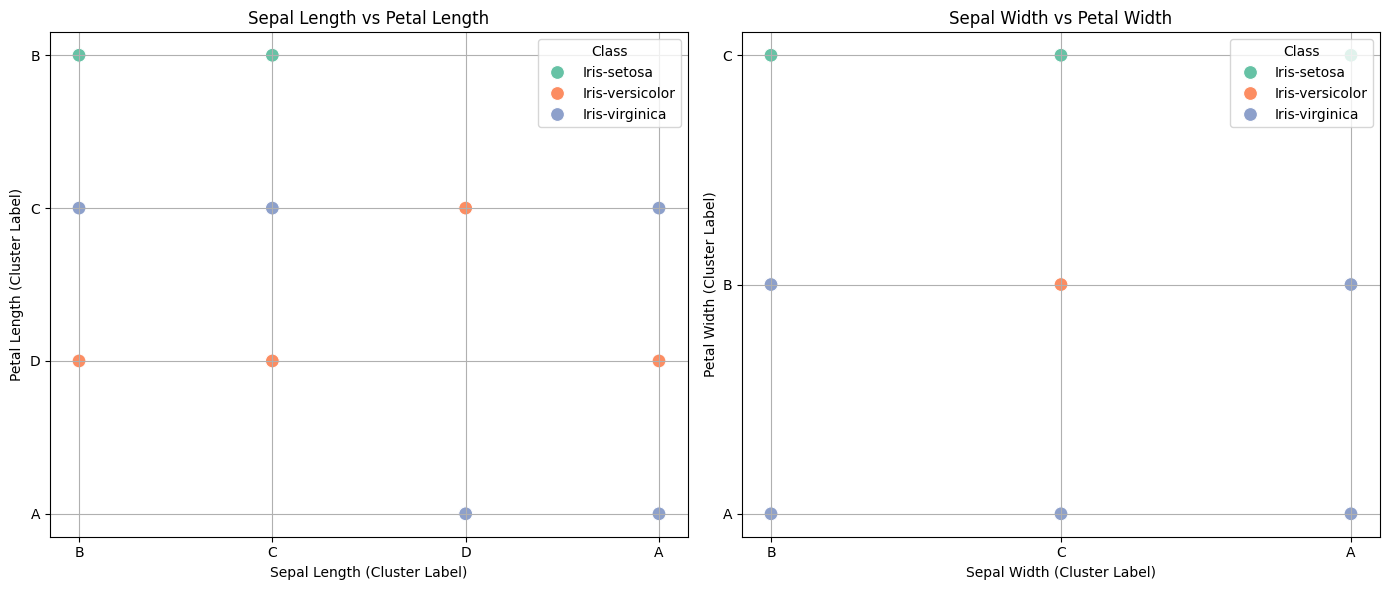

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Subplot 1: Sepal Length vs Petal Length
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_merged,
    x='sepal length',
    y='petal length',
    hue='class',
    palette='Set2',
    s=100
)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (Cluster Label)')
plt.ylabel('Petal Length (Cluster Label)')
plt.legend(title='Class')
plt.grid(True)

# Subplot 2: Sepal Width vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_merged,
    x='sepal width',
    y='petal width',
    hue='class',
    palette='Set2',
    s=100
)
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (Cluster Label)')
plt.ylabel('Petal Width (Cluster Label)')
plt.legend(title='Class')
plt.grid(True)

plt.tight_layout()
plt.show()


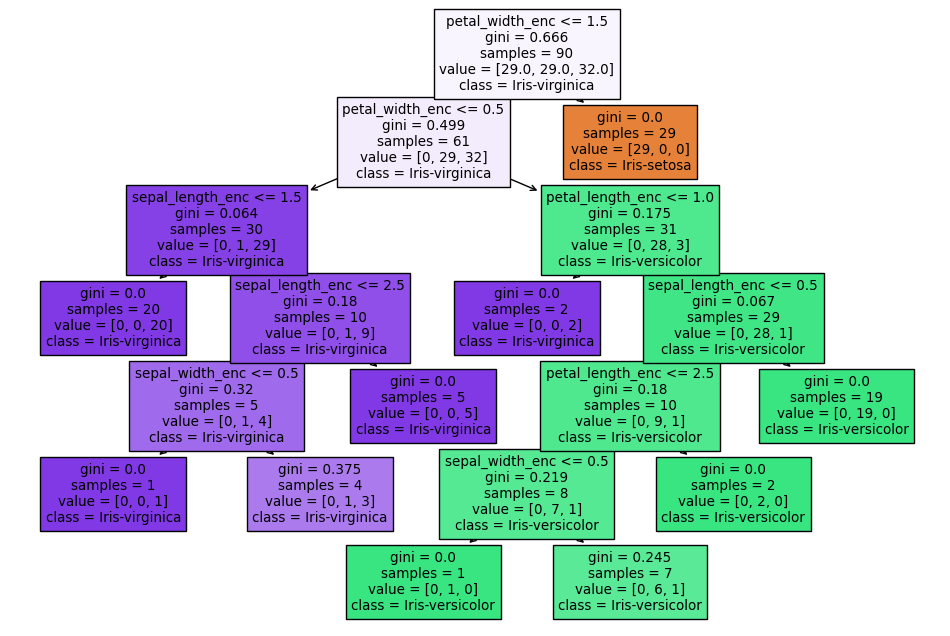

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()


## Sebelum Diskritisasi

### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ambil data dari kedua database lagi untuk mendapatkan fitur numerik asli
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")


# Ambil fitur numerik asli
X = df_merged[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df_merged['class']  # Tetap gunakan label string seperti 'Iris-setosa', dst.

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Inisialisasi dan latih model Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("Akurasi (tanpa diskritisasi):", accuracy_score(y_test, y_pred))
print("Classification Report (tanpa diskritisasi):\n", classification_report(y_test, y_pred))

Akurasi (tanpa diskritisasi): 0.95
Classification Report (tanpa diskritisasi):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.95      0.90      0.93        21
 Iris-virginica       0.89      0.94      0.92        18

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



### Decision Tree (Pohon Keputusan)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd # Ensure pandas is imported if not already

# Ambil data dari kedua database lagi untuk mendapatkan fitur numerik asli
# Assuming get_pg_data and get_mysql_data functions are defined elsewhere
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")


# --- Siapkan fitur numerik asli dan target ---
X = df_merged[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df_merged['class']  # Tetap gunakan label string: 'Iris-setosa', dll

# --- Split data menjadi training dan testing (80:20) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# --- Inisialisasi dan latih Decision Tree ---
clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train, y_train)

# --- Prediksi dan evaluasi hasil ---
y_pred = clf.predict(X_test)

print("Akurasi (tanpa diskritisasi):", accuracy_score(y_test, y_pred))
print("\nClassification Report (tanpa diskritisasi):\n", classification_report(y_test, y_pred))

Akurasi (tanpa diskritisasi): 0.9666666666666667

Classification Report (tanpa diskritisasi):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



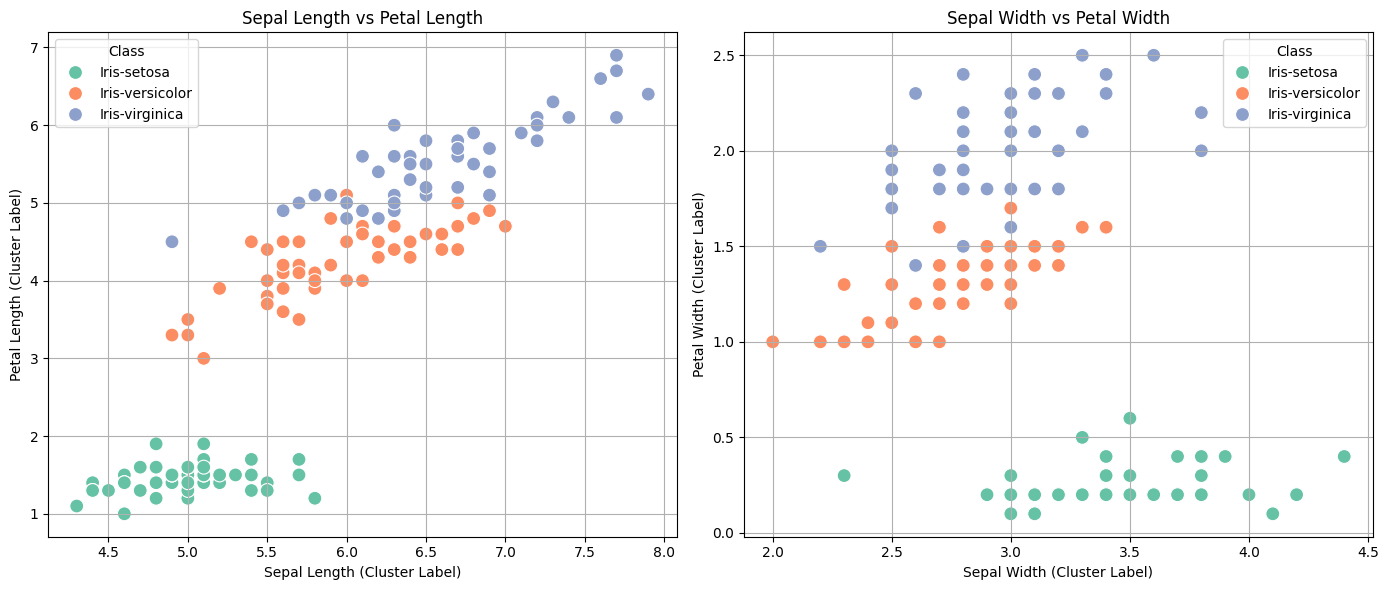

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Subplot 1: Sepal Length vs Petal Length
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_merged,
    x='sepal length',
    y='petal length',
    hue='class',
    palette='Set2',
    s=100
)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (Cluster Label)')
plt.ylabel('Petal Length (Cluster Label)')
plt.legend(title='Class')
plt.grid(True)

# Subplot 2: Sepal Width vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_merged,
    x='sepal width',
    y='petal width',
    hue='class',
    palette='Set2',
    s=100
)
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (Cluster Label)')
plt.ylabel('Petal Width (Cluster Label)')
plt.legend(title='Class')
plt.grid(True)

plt.tight_layout()
plt.show()


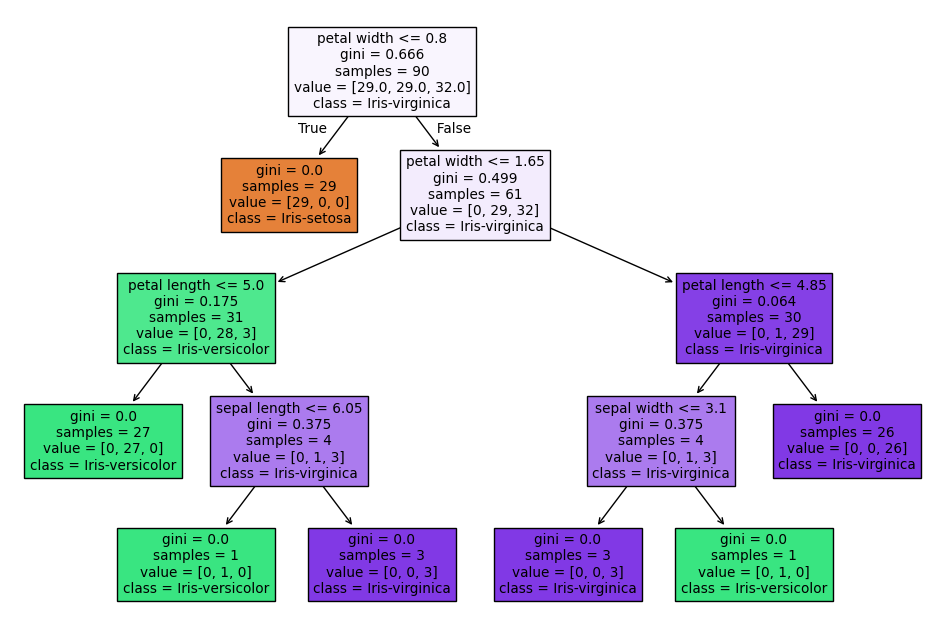

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()
